<a href="https://colab.research.google.com/github/timcarrara/AirBNB_IA/blob/main/Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Airbnb_Data.csv')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [11]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

,0
id,0
log_price,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,200
bed_type,0
cancellation_policy,0
cleaning_fee,0


In [12]:
df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)
df['amenities_count'] = df['amenities'].apply(lambda x: len(x.split(',')))


/tmp/ipython-input-923832268.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['review_scores_rating'].fillna(df['review_scores_rating'].mean(), inplace=True)


,log_price
neighbourhood,
Wilmington,7.170120
"Chevy Chase, MD",7.130899
Observatory Circle,6.715383
Sea Cliff,6.259786
Mill Basin,6.214608
Emerson Hill,6.138033
Skyland,5.959195
Malibu,5.926612
Bellevue,5.905828


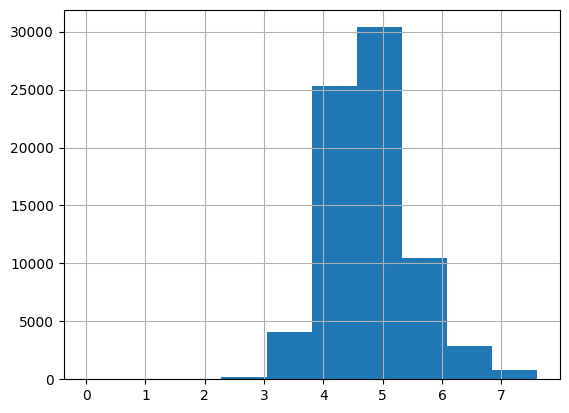

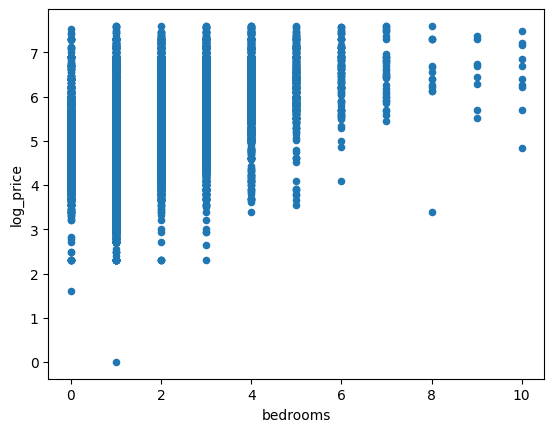

In [13]:
df['log_price'].hist()
df.plot.scatter(x='bedrooms', y='log_price')
df.groupby('neighbourhood')['log_price'].mean().sort_values(ascending=False).head(10)


In [14]:
df = pd.get_dummies(df, columns=['property_type', 'room_type', 'bed_type', 'cancellation_policy'], drop_first=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop('log_price', axis=1)
y = df['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


ValueError: could not convert string to float: '{TV,"Cable TV",Internet,"Wireless Internet","Air conditioning",Kitchen,"Pets live on this property",Dog(s),"Hot tub",Heating,Washer,Dryer,"Smoke detector","Fire extinguisher",Essentials,"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}'